In [2]:

import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
intel_df = pd.read_csv('../data/deep_learning_data/INTC.csv')
applied_materials_df = pd.read_csv('../data/deep_learning_data/AMAT.csv')
taiwan_semiconductor_df = pd.read_csv('../data/deep_learning_data/TSM.csv')
dell_df = pd.read_csv('../data/deep_learning_data/DELL.csv')
hp_df = pd.read_csv('../data/deep_learning_data/HPQ.csv')
lenovo_df = pd.read_csv('../data/deep_learning_data/LNVGF.csv')
arrow_electronics_df = pd.read_csv('../data/deep_learning_data/ARW.csv')
avnet_df = pd.read_csv('../data/deep_learning_data/AVT.csv')
synnex_corp_df = pd.read_csv('../data/deep_learning_data/SNX.csv')
advanced_micro_divices_df = pd.read_csv('../data/deep_learning_data/AMD.csv')
nvidia_df = pd.read_csv('../data/deep_learning_data/NVDA.csv')
qualcomn_df = pd.read_csv('../data/deep_learning_data/QCOM.csv')
broadcom_df = pd.read_csv('../data/deep_learning_data/AVGO.csv')
micron_df = pd.read_csv('../data/deep_learning_data/MU.csv')
texas_inst__df = pd.read_csv('../data/deep_learning_data/TXN.csv')
sk_hynix_df = pd.read_csv('../data/deep_learning_data/000660.KS.csv')


intel_df.set_index('Date',inplace=True)
applied_materials_df.set_index('Date',inplace=True)
taiwan_semiconductor_df.set_index('Date',inplace=True)
dell_df.set_index('Date',inplace=True)
hp_df.set_index('Date',inplace=True)
lenovo_df.set_index('Date',inplace=True)
arrow_electronics_df.set_index('Date',inplace=True)
avnet_df.set_index('Date',inplace=True)
synnex_corp_df.set_index('Date',inplace=True)
advanced_micro_divices_df.set_index('Date',inplace=True)
nvidia_df.set_index('Date',inplace=True)
qualcomn_df.set_index('Date',inplace=True)
broadcom_df.set_index('Date',inplace=True)
micron_df.set_index('Date',inplace=True)
texas_inst__df.set_index('Date',inplace=True)
sk_hynix_df.set_index('Date',inplace=True)



intel_df = intel_df[['Close']]
applied_materials_df = applied_materials_df[['Close']]
taiwan_semiconductor_df = taiwan_semiconductor_df[['Close']]
dell_df = dell_df[['Close']]
hp_df = hp_df[['Close']]
lenovo_df = lenovo_df[['Close']]
arrow_electronics_df = arrow_electronics_df[['Close']]
avnet_df = avnet_df[['Close']]
synnex_corp_df = synnex_corp_df[['Close']]
advanced_micro_divices_df = advanced_micro_divices_df[['Close']]
nvidia_df = nvidia_df[['Close']]
qualcomn_df = qualcomn_df[['Close']]
broadcom_df = broadcom_df[['Close']]
micron_df = micron_df[['Close']]
texas_inst__df = texas_inst__df[['Close']]
sk_hynix_df = sk_hynix_df[['Close']]

intel_df.rename(columns={'Close': 'intel'},inplace=True)
applied_materials_df.rename(columns={'Close': 'applied_materials'},inplace=True)
taiwan_semiconductor_df.rename(columns={'Close': 'taiwan_semiconductor'},inplace=True)
dell_df.rename(columns={'Close': 'dell'},inplace=True)
hp_df.rename(columns={'Close': 'hp'},inplace=True)
lenovo_df.rename(columns={'Close': 'lenovo'},inplace=True)
arrow_electronics_df.rename(columns={'Close': 'arrow_electronics'},inplace=True)
avnet_df.rename(columns={'Close': 'avnet'},inplace=True)
synnex_corp_df.rename(columns={'Close': 'synnex_corp'},inplace=True)
advanced_micro_divices_df.rename(columns={'Close': 'advanced_micro_divices'},inplace=True)
nvidia_df.rename(columns={'Close': 'nvidia'},inplace=True)
qualcomn_df.rename(columns={'Close': 'qualcomn'},inplace=True)
broadcom_df.rename(columns={'Close': 'broadcom'},inplace=True)
micron_df.rename(columns={'Close': 'micron'},inplace=True)
texas_inst__df.rename(columns={'Close': 'texas_inst'},inplace=True)
sk_hynix_df.rename(columns={'Close': 'sk_hynix'},inplace=True)

In [16]:
supply_chain = pd.concat([applied_materials_df, taiwan_semiconductor_df, dell_df, hp_df, lenovo_df, arrow_electronics_df, avnet_df,synnex_corp_df], axis=1, join='inner')
competitors = pd.concat([texas_inst__df,micron_df,broadcom_df,advanced_micro_divices_df, nvidia_df, qualcomn_df], axis=1, join='inner')
target = intel_df

In [17]:
broadcom_df

,broadcom
Date,
2016-08-17,173.029999
2016-08-18,173.929993
2016-08-19,174.929993
2016-08-22,175.929993
2016-08-23,177.339996
...,...
2019-12-12,327.799988
2019-12-13,315.420013
2019-12-16,323.130005


In [11]:
target

,intel
Date,
2016-08-17,35.020000
2016-08-18,34.970001
2016-08-19,35.240002
2016-08-22,35.360001
2016-08-23,35.400002
...,...
2019-12-12,57.549999
2019-12-13,57.790001
2019-12-16,57.700001


In [18]:
#SUPPLY CHAIN ANALYSIS
#data split

train_data, test_data, train_targets, test_targets = train_test_split(competitors, target, test_size = 0.2, random_state = 1)

In [19]:
#train and fit linear regression model

model_linear = LinearRegression(normalize=True)
model_linear.fit(train_data,train_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
#predict from linear regresion model
y_predicted_linear = model_linear.predict(test_data)

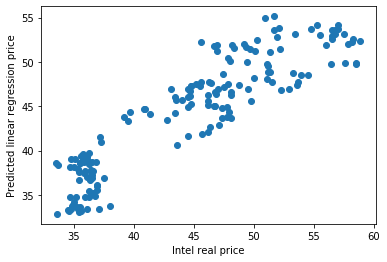

In [21]:
#plot real values vs predicted from linear model
plt.scatter(test_targets,y_predicted_linear)
plt.xlabel('Intel real price')
plt.ylabel('Predicted linear regression price')
plt.show()

In [22]:
#normalize data for deep learning

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [23]:
train_data.shape

(672, 6)

In [24]:
test_data.shape

(169, 6)

In [25]:
#turn dataframes into tensors

train_data = train_data.to_numpy()
test_data = test_data.to_numpy()
train_targets = train_targets.to_numpy()

In [26]:
features_tensor = supply_chain.to_numpy()
target_tensor = target.to_numpy()

In [27]:
#Define the Deep Learning model using the library Keras. 

from keras import models
from keras import layers 

def build_model():
    model_DeepLearning = models.Sequential()
    model_DeepLearning.add(layers.Dense(16, activation = 'relu',input_shape=(train_data.shape[1],)))
    model_DeepLearning.add(layers.Dense(2, activation = 'relu'))
    model_DeepLearning.add(layers.Dense(1))
    model_DeepLearning.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model_DeepLearning

In [28]:
#K-fold validation: Running the number of epochs k number of times, and then calculating the average of the loss values obteained at each time pass between 1 and k.


import numpy as np

k=4
num_val_samples = len(train_data) // k
all_scores = []

In [29]:
#Fit the model to the data first using a for loop for K-fold validation. Training the model on silent mode

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold#',i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis = 0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis = 0)
    
    model_DeepLearning = build_model()
    history = model_DeepLearning.fit(partial_train_data,partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs,batch_size=1,verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold# 0
processing fold# 1
processing fold# 2
processing fold# 3


In [17]:
#loss value

np.mean(all_mae_histories)

5.699553377091885

In [18]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

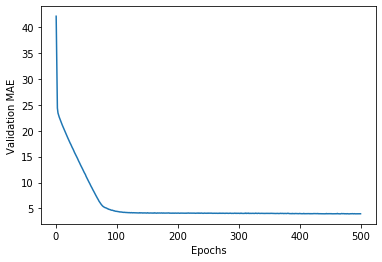

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

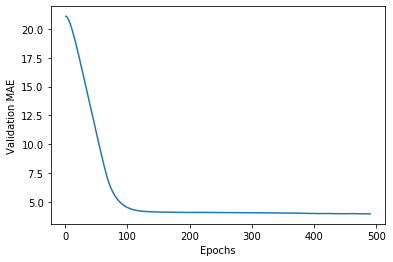

In [20]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [21]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_mae', 'val_acc', 'loss', 'mae', 'acc'])


dict_keys(['val_loss', 'val_mae', 'val_acc', 'loss', 'mae', 'acc'])


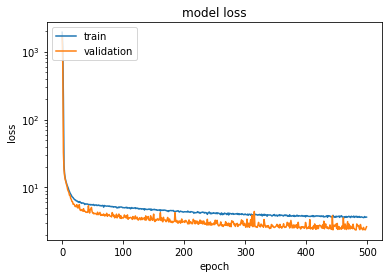

In [22]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
mean = features_tensor.mean(axis=0)
features_tensor -= mean
std = features_tensor.std(axis=0)
features_tensor /= std

In [24]:
y_predict_DeepLearning = model_DeepLearning.predict(test_data)

In [25]:
y_predict_DeepLearning.shape

(169, 1)

In [26]:
predicted_values_DeepLearning_df = pd.DataFrame(y_predict_DeepLearning)
predicted_values_DeepLearning_df.rename(columns={0: 'Predicted Deep Learning'},inplace=True)

In [27]:
predicted_values_DeepLearning_df

,Predicted Deep Learning
0,52.420475
1,34.845215
2,53.479622
3,34.534195
4,35.573597
...,...
164,52.575493
165,57.151672
166,45.984035
167,52.081413


In [28]:
test_targets.reset_index(inplace=True)

In [29]:
test_targets

,Date,intel
0,2018-07-19,51.980000
1,2017-05-16,35.820000
2,2019-03-29,53.700001
3,2017-01-26,37.560001
4,2017-09-06,35.759998
...,...,...
164,2018-05-24,54.750000
165,2019-11-05,57.549999
166,2018-10-10,44.799999
167,2019-04-25,57.610001


In [30]:
predicted_values_linear_df = pd.DataFrame(y_predicted_linear)
predicted_values_linear_df.rename(columns={0: 'Predicted Linear Regression'},inplace=True)

In [31]:
real_vs_predicted_df = pd.concat([test_targets, predicted_values_DeepLearning_df,predicted_values_linear_df], axis=1, join='inner')

In [32]:
real_vs_predicted_df

,Date,intel,Predicted Deep Learning,Predicted Linear Regression
0,2018-07-19,51.980000,52.420475,49.463901
1,2017-05-16,35.820000,34.845215,40.405186
2,2019-03-29,53.700001,53.479622,47.871146
3,2017-01-26,37.560001,34.534195,37.793450
4,2017-09-06,35.759998,35.573597,42.332463
...,...,...,...,...
164,2018-05-24,54.750000,52.575493,47.977443
165,2019-11-05,57.549999,57.151672,53.853301
166,2018-10-10,44.799999,45.984035,52.093135
167,2019-04-25,57.610001,52.081413,49.268825


In [33]:
correl_complete = real_vs_predicted_df.corr().abs()

In [34]:
correl_complete

,intel,Predicted Deep Learning,Predicted Linear Regression
intel,1.000000,0.960278,0.827704
Predicted Deep Learning,0.960278,1.000000,0.860044
Predicted Linear Regression,0.827704,0.860044,1.000000


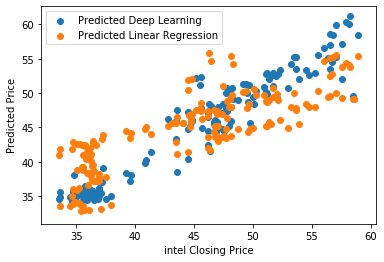

In [35]:
import matplotlib.pyplot as plt
plt.scatter(real_vs_predicted_df['intel'], real_vs_predicted_df['Predicted Deep Learning'])
plt.scatter(real_vs_predicted_df['intel'], real_vs_predicted_df['Predicted Linear Regression'])
plt.xlabel('intel Closing Price')
plt.ylabel('Predicted Price')
plt.legend(['Predicted Deep Learning', 'Predicted Linear Regression'], loc='upper left')
plt.show()